# Implementation of Naive Bayes Classifier

## Step 1 - Import libraries

In [1]:
## Import Libraries
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian Naive Bayes
Perhaps the easiest naive Bayes classifier to understand is the Gaussian naive Bayes. The assumption made here is that data from each label is drawn from a simple Gaussian distribution.

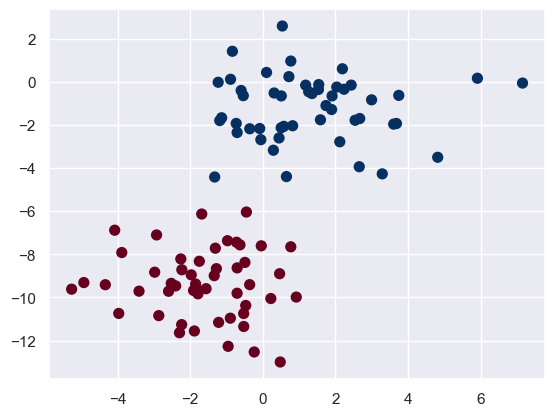

In [2]:
from sklearn.datasets import make_blobs  ####make_blobs is used to generate synthetic 2-dimensional data. Think of it like a randomly generated dataframe.
X,y = make_blobs(100,2,centers = 2, random_state = 2, cluster_std =1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. 

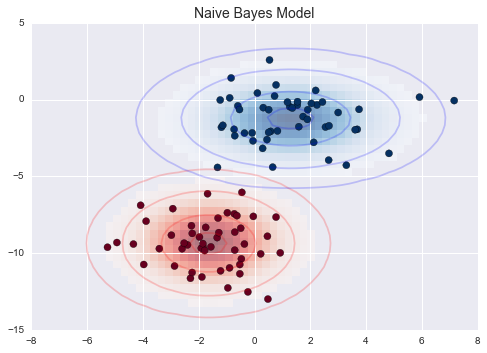

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood P(features | L1)
 for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

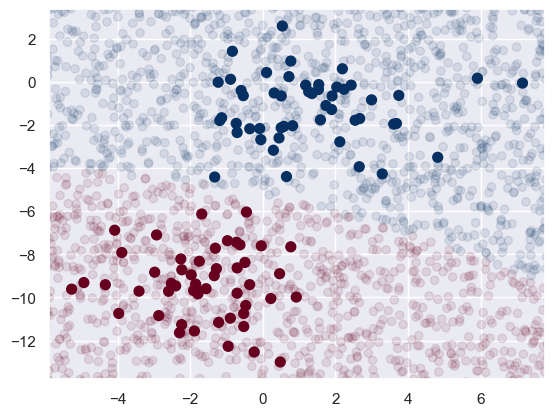

In [6]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,cmap = 'RdBu', alpha = 0.1)
plt.axis(lim);